# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('/vehicles_us.csv')

In [2]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


The 'condition' column will need to be reformatted to be able to preform numeric calculations on it as well as plot it, and there seems to be a clear issue with 'is_4wd' not having the correct values.

## Data preprocessing

In [3]:
df['is_4wd'] = df['is_4wd'].replace(1.0, True)
df['is_4wd'] = df['is_4wd'].fillna(False)

df['date_posted'] = pd.to_datetime(df['date_posted'])
df.drop_duplicates()
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


I replaced the values in is_4wd with True and False and it seemed to be most likely the case the "1.0" and "Nan" values were simply a true and false category. Typically 1 is True and 0 is False and the question of whether it's a 4 wheel drive or not being boolean, so I presumed the same and assumed 1.0 was meant to represent True. If it's then the case that 1.0 is true, it would naturally follow the other variables that aren't 1.0 are false,  which in this case were NaN.

I also converted date_posted to datetime to make the next columns easier to make.

For model year, odometer, and paint color there are missing values but too little information to fill them in with anything, or to determine why they're missing in the first place. There doesn't appear to be any correlation between NaN and other values.

In [4]:
## Fixing data column types
df['model_year'] = df['model_year'].astype(pd.Int64Dtype())
df['cylinders'] = df['cylinders'].astype(pd.Int64Dtype())
df['odometer'] = df['odometer'].astype(pd.Int64Dtype())

#### I move the following from the next sction to here:

## Replacing condition column with numeric values
def corrected_condition(row):
    if row['condition'] == 'like new':
        return 4
    if row['condition'] == 'new':
        return 5
    if row['condition'] == 'excellent':
        return 3
    if row['condition'] == 'good':
        return 2
    if row['condition'] == 'fair':
        return 1
    if row['condition'] == 'salvage':
        return 0
    
df['condition'] = df.apply(lambda row: corrected_condition(row), axis=1)

In [5]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,1,8,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71


## Make calculations and add them to the table

In [6]:
## This creates a column for how many years old the vehicle is
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year']

## Creating the columns for the day of the week, month, and year
df['date_posted_day'] = df['date_posted'].dt.day_name()
df['date_posted_month'] = df['date_posted'].dt.month_name()
df['date_posted_year'] = df['date_posted'].dt.year

## Column for average mileage per year
df['mileage_per_year'] = df['odometer'] / df['vehicle_age']

df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,date_posted_day,date_posted_month,date_posted_year,mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19,7,Saturday,June,2018,20714.285714
1,25500,NaN,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,Friday,October,2018,NaN
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,Thursday,February,2019,18333.333333
3,1500,2003,ford f-150,1,8,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,16,Friday,March,2019,NaN
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,Tuesday,April,2019,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,5,Wednesday,October,2018,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,16,Wednesday,November,2018,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,9,Thursday,November,2018,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,5,Monday,July,2018,27914.600000


I added each column using the other preexisting columns and calculated it's general age using model year - the year the ad was published.

## Carry out exploratory data analysis

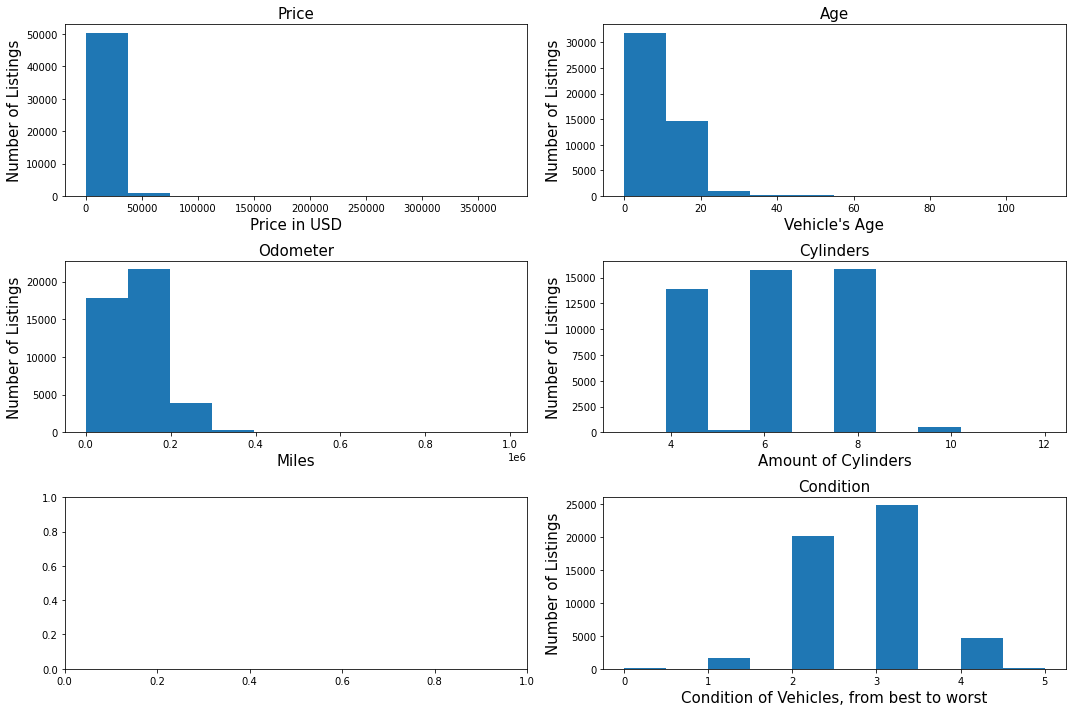

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

ax[0, 0].hist(df['price']);
ax[0, 0].set_xlabel('Price in USD', fontsize=15);
ax[0, 0].set_ylabel('Number of Listings', fontsize=15);
ax[0, 0].set_title('Price', fontsize=15);

ax[0, 1].hist(df['vehicle_age']);
ax[0, 1].set_xlabel("Vehicle's Age", fontsize=15);
ax[0, 1].set_ylabel('Number of Listings', fontsize=15);
ax[0, 1].set_title('Age', fontsize=15);

ax[1, 0].hist(df['odometer']);
ax[1, 0].set_xlabel('Miles', fontsize=15);
ax[1, 0].set_ylabel('Number of Listings', fontsize=15);
ax[1, 0].set_title('Odometer', fontsize=15);

ax[1, 1].hist(df['cylinders']);
ax[1, 1].set_xlabel('Amount of Cylinders', fontsize=15);
ax[1, 1].set_ylabel('Number of Listings', fontsize=15);
ax[1, 1].set_title('Cylinders', fontsize=15);

ax[2, 1].hist(df['condition']);
ax[2, 1].set_xlabel('Condition of Vehicles, from best to worst', fontsize=15);
ax[2, 1].set_ylabel('Number of Listings', fontsize=15);
ax[2, 1].set_title('Condition', fontsize=15);
plt.tight_layout()

The Price chart seems to have a/multiple significant outliers, drawing the price to about 400k on the far end. The number of listings also decreases rapidly at 50k according to the chart. The same applies to the Odometer, which one number supposedly reaching a million miles on the odometer. The Age chart suffers from the same type of outliers, all squishing the data onto the left side. Cylinders and Conditions appear to have a few outliers that create a new x value for the right side with almost no bar.

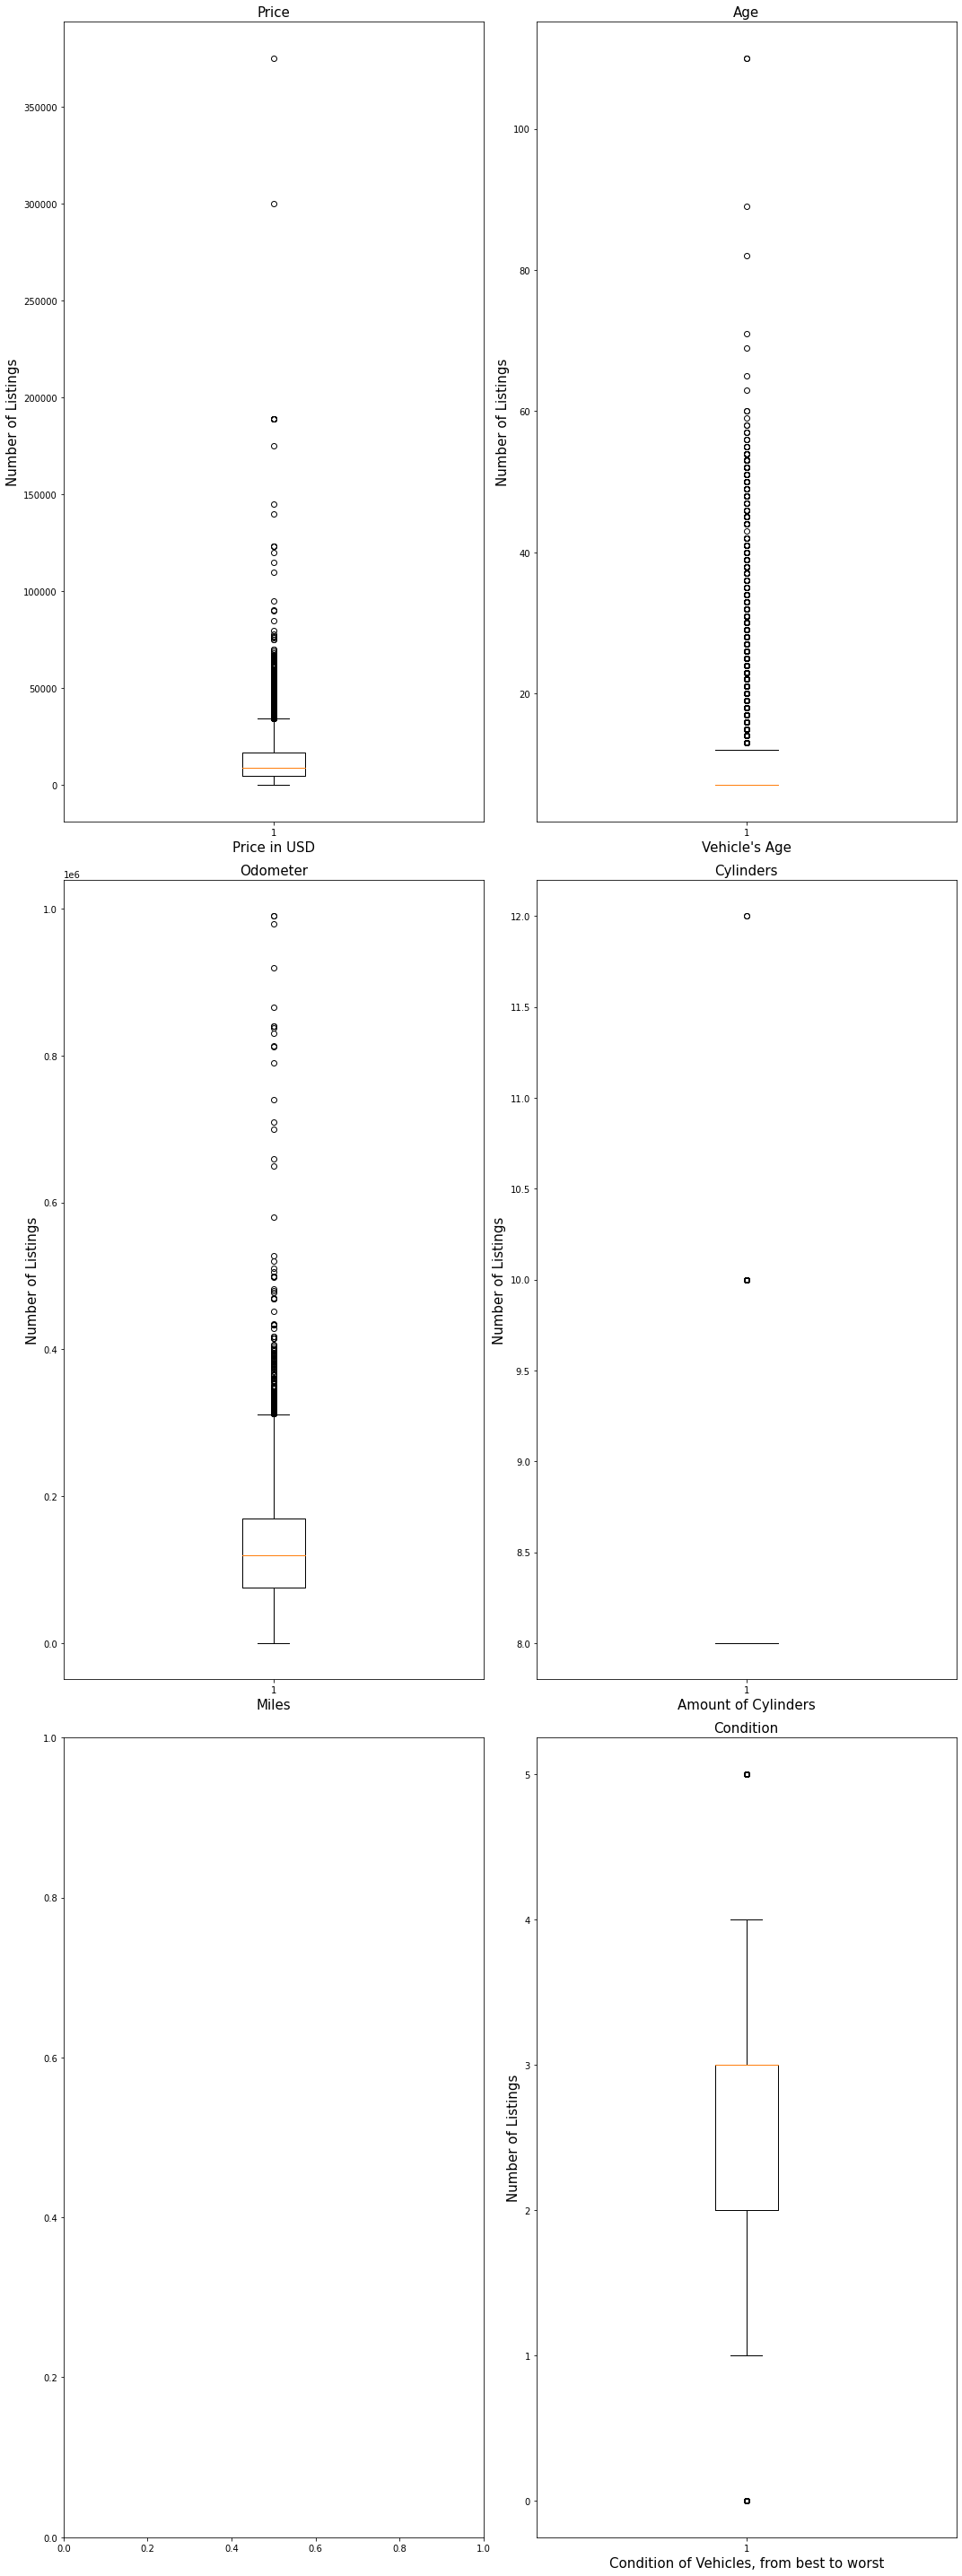

In [8]:
x, y = plt.subplots(nrows=3, ncols=2, figsize=(15, 40))

y[0, 0].boxplot(df['price']);
y[0, 0].set_xlabel('Price in USD', fontsize=15);
y[0, 0].set_ylabel('Number of Listings', fontsize=15);
y[0, 0].set_title('Price', fontsize=15);

y[0, 1].boxplot(df['vehicle_age']);
y[0, 1].set_xlabel("Vehicle's Age", fontsize=15);
y[0, 1].set_ylabel('Number of Listings', fontsize=15);
y[0, 1].set_title('Age', fontsize=15);

y[1, 0].boxplot(df['odometer']);
y[1, 0].set_xlabel('Miles', fontsize=15);
y[1, 0].set_ylabel('Number of Listings', fontsize=15);
y[1, 0].set_title('Odometer', fontsize=15);

y[1, 1].boxplot(df['cylinders']);
y[1, 1].set_xlabel('Amount of Cylinders', fontsize=15);
y[1, 1].set_ylabel('Number of Listings', fontsize=15);
y[1, 1].set_title('Cylinders', fontsize=15);

y[2, 1].boxplot(df['condition']);
y[2, 1].set_xlabel('Condition of Vehicles, from best to worst', fontsize=15);
y[2, 1].set_ylabel('Number of Listings', fontsize=15);
y[2, 1].set_title('Condition', fontsize=15);

plt.tight_layout()

The boxplots clearly show the outliers out of the normal range, each category having their own rare values far outside of the normal.

In [9]:
filtered_df = df

filtered_df['price'] = filtered_df['price'].loc[(filtered_df['price'] < filtered_df['price'].quantile(0.99))]
filtered_df['vehicle_age'] = filtered_df['vehicle_age'].loc[(filtered_df['vehicle_age'] < filtered_df['vehicle_age'].quantile(0.99))]
filtered_df['odometer'] = filtered_df['odometer'].loc[(filtered_df['odometer'] < filtered_df['odometer'].quantile(0.99))]
filtered_df['cylinders'] = filtered_df['cylinders'].loc[(filtered_df['cylinders'] < 12) & (3 < filtered_df['cylinders'])]
filtered_df['condition'] = filtered_df['condition'].loc[(filtered_df['condition'] < 5) & (0 < filtered_df['condition'])]

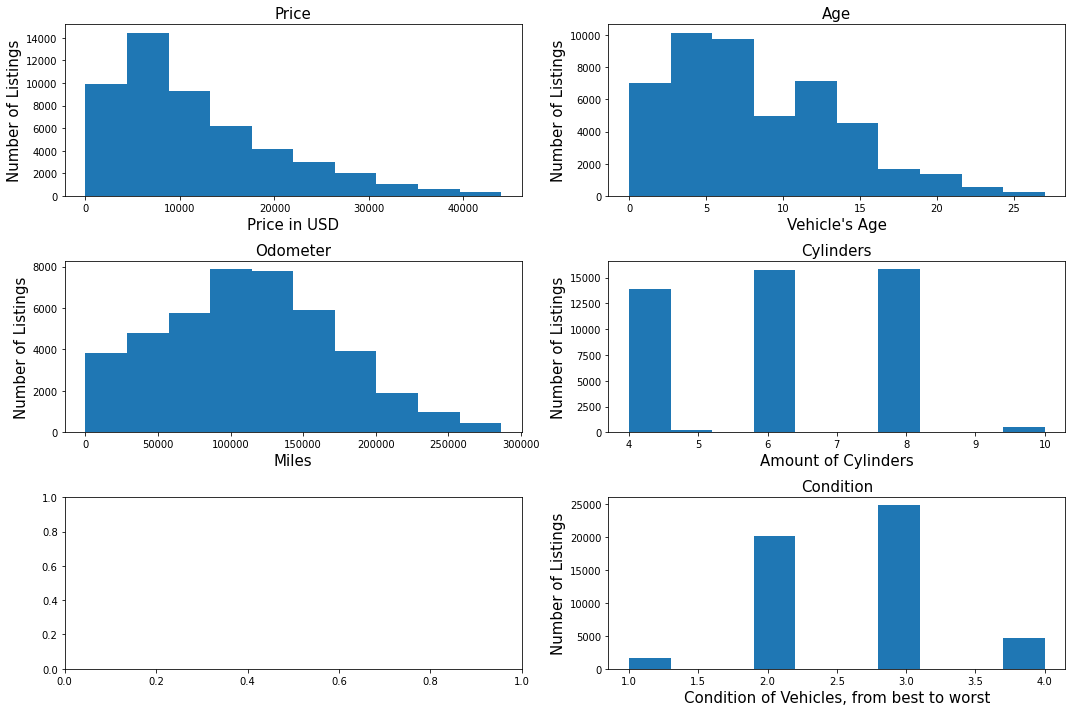

In [10]:
c, z = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

z[0, 0].hist(filtered_df['price']);
z[0, 0].set_xlabel('Price in USD', fontsize=15);
z[0, 0].set_ylabel('Number of Listings', fontsize=15);
z[0, 0].set_title('Price', fontsize=15);

z[0, 1].hist(filtered_df['vehicle_age']);
z[0, 1].set_xlabel("Vehicle's Age", fontsize=15);
z[0, 1].set_ylabel('Number of Listings', fontsize=15);
z[0, 1].set_title('Age', fontsize=15);

z[1, 0].hist(filtered_df['odometer']);
z[1, 0].set_xlabel('Miles', fontsize=15);
z[1, 0].set_ylabel('Number of Listings', fontsize=15);
z[1, 0].set_title('Odometer', fontsize=15);

z[1, 1].hist(filtered_df['cylinders']);
z[1, 1].set_xlabel('Amount of Cylinders', fontsize=15);
z[1, 1].set_ylabel('Number of Listings', fontsize=15);
z[1, 1].set_title('Cylinders', fontsize=15);

z[2, 1].hist(filtered_df['condition']);
z[2, 1].set_xlabel('Condition of Vehicles, from best to worst', fontsize=15);
z[2, 1].set_ylabel('Number of Listings', fontsize=15);
z[2, 1].set_title('Condition', fontsize=15);

plt.tight_layout()

I decided the best way to filter the data for outliers would be to simply cut off the values that are in the top 1%. This would easily cut off the outliers without sacrificing much data at all. For cylinders and condition I manually cut off the outliers as the values were much smaller and thus easier to do it to. After doing so, the data in the histograms is much more clear and it's range is much more clearly visible than with the outliers, and is more properly zoomed in.

The condition of the cars tends to be around 2-3 which is expected of a used car, as with the odometer miles, resting around 100k-150k miles for the majority. Comparing the odometer to the price graph, those heavily used cars are often less than 10k, and more often 5k. The age of these vehicles has a spike around 3-7 years, which is a bit surprising considering the other graphs would make one think these are much more heavily used.

The mean of days_listed is 39.55
The median of days_listed is 33.0


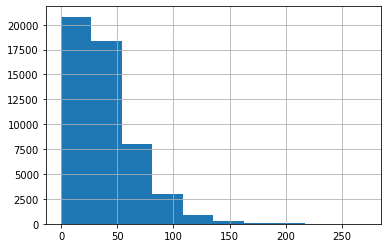

In [11]:
filtered_df['days_listed'].hist()

print('The mean of days_listed is {:.4}'.format(df["days_listed"].mean()))
print('The median of days_listed is {:.4}'.format(df["days_listed"].median()))

The average listing is about a month long and then removed. There are some that are up for much longer, maybe double or triple the avergae, and these listings may have an unreasonable price comparatively, hence why they stay up for so long, or it could be that some car types are much quicker sells than others, like how buses would likely take much longer than an SUV. Since 3 months is a long time to try to sell a vehicle, it may be the case they're more often removed by the owner rather than sold. Some vehicles sell in much quicker time and is mostly likely the case that they were listed for a good price and bought quickly. Given that a significant portion of listings don't stay up for very long, it may be reasonable to infer that these cars are bought often around just a month, otherwise there would be a higher average days that listings stay listed.

             price
type              
SUV          12306
convertible    428
coupe         2266
hatchback     1047
mini-van      1158
offroad        210
other          255
pickup        6900
sedan        12150
truck        12091
van            632
wagon         1538


Text(0, 0.5, 'Listings')

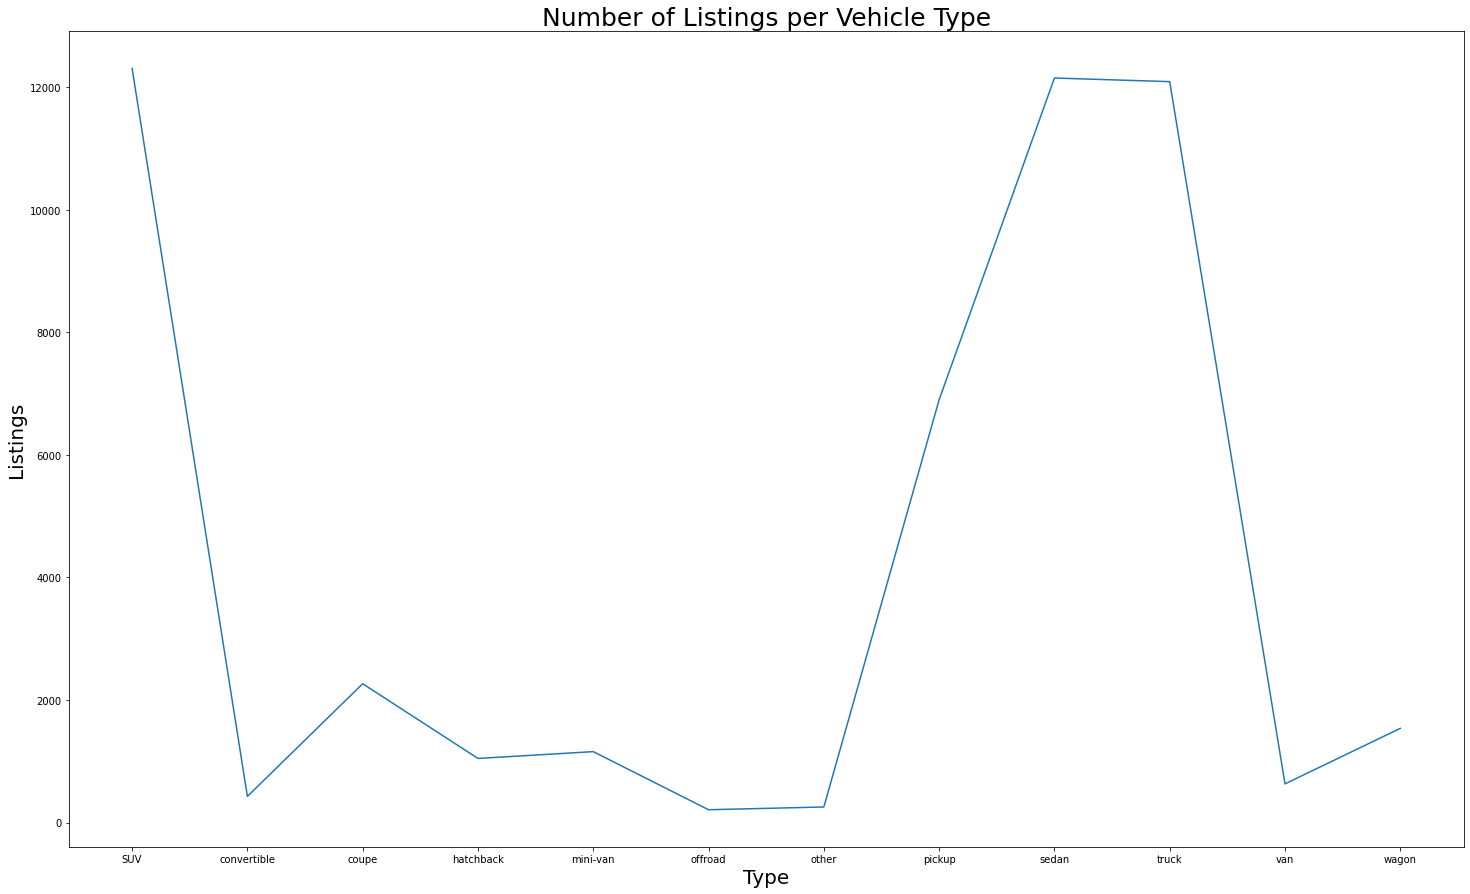

In [12]:
ads_pvt = df.pivot_table(index='type', values='price', aggfunc='count')

# Bus has too few ads to be worth including
ads_pvt = ads_pvt.drop('bus')

print(ads_pvt)

plt.figure(figsize=(25, 15))
plt.plot(ads_pvt)
plt.title('Number of Listings per Vehicle Type', size=25)
plt.xlabel('Type', size=20)
plt.ylabel('Listings', size=20)

Looking at the chart and pivot table, SUV and Sedan are the most popularly listed vehicle types.

In [13]:
filtered_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,date_posted_day,date_posted_month,date_posted_year,mileage_per_year
0,9400.0,2011,bmw x5,2.0,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19,7,Saturday,June,2018,20714.285714
1,25500.0,NaN,ford f-150,2.0,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,Friday,October,2018,NaN
2,5500.0,2013,hyundai sonata,4.0,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,Thursday,February,2019,18333.333333
3,1500.0,2003,ford f-150,1.0,8,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,16,Friday,March,2019,NaN
4,14900.0,2017,chrysler 200,3.0,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,Tuesday,April,2019,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4.0,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,5,Wednesday,October,2018,17627.200000
51521,2700.0,2002,honda civic,NaN,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,16,Wednesday,November,2018,11343.750000
51522,3950.0,2009,hyundai sonata,3.0,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,9,Thursday,November,2018,14222.222222
51523,7455.0,2013,toyota corolla,2.0,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,5,Monday,July,2018,27914.600000


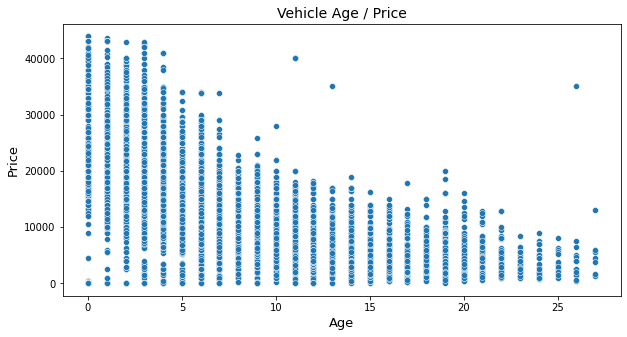

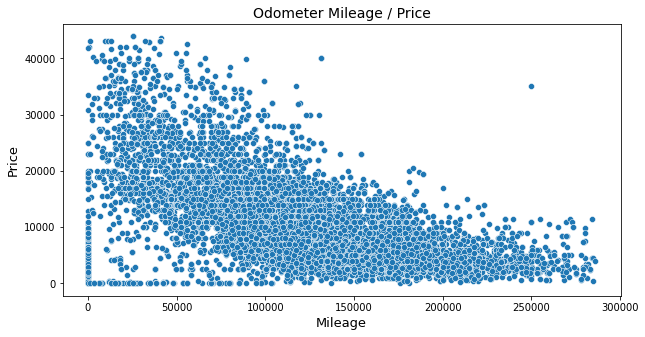

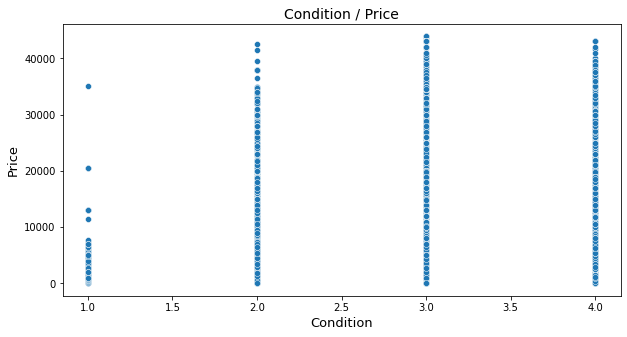

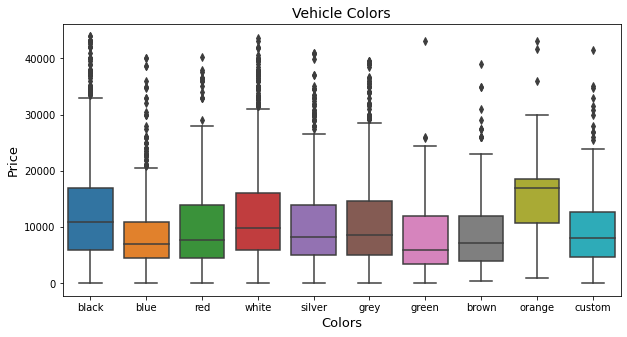

In [14]:
suv_cars_only = filtered_df.query('paint_color != "yellow" & paint_color != "purple" & type == "SUV"')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=suv_cars_only, x='vehicle_age', y='price')
plt.title('Vehicle Age / Price', size=14)
plt.xlabel('Age', size=13)
plt.ylabel('Price', size=13);

plt.figure(figsize=(10, 5))
sns.scatterplot(data=suv_cars_only, x='odometer', y='price')
plt.title('Odometer Mileage / Price', size=14)
plt.xlabel('Mileage', size=13)
plt.ylabel('Price', size=13);

plt.figure(figsize=(10, 5))
sns.scatterplot(data=suv_cars_only, x='condition', y='price')
plt.title('Condition / Price', size=14)
plt.xlabel('Condition', size=13)
plt.ylabel('Price', size=13);

plt.figure(figsize=(10, 5))
sns.boxplot(data=suv_cars_only, x='paint_color', y='price')
plt.title('Vehicle Colors', size=14)
plt.xlabel('Colors', size=13)
plt.ylabel('Price', size=13);

The results for SUVs show a linear decrease in price as more miles accumulate on the odometer, as well as a linear decrease in age. With the condition of the vehicles there are significantly less vehicles with a condtion of 'Like New', which is reasonable as most people wouldn't resell such a new vehicle so soon. With vehicle colors, orange is suprisingly much more noticeably higher priced than other colors.

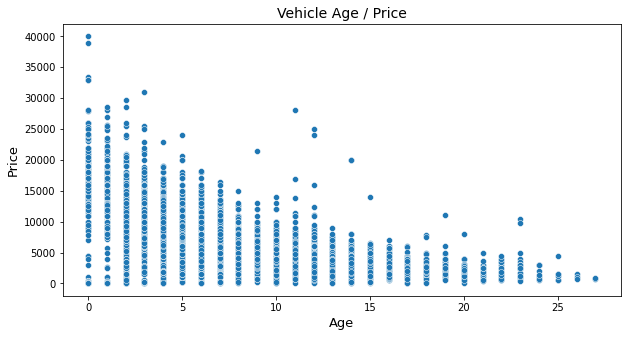

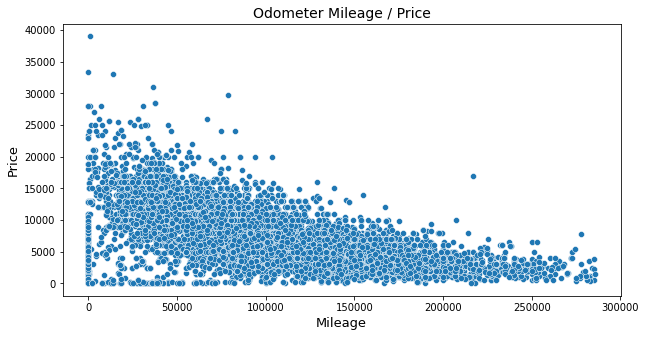

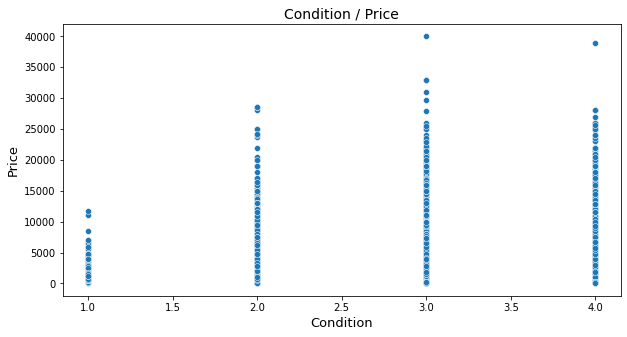

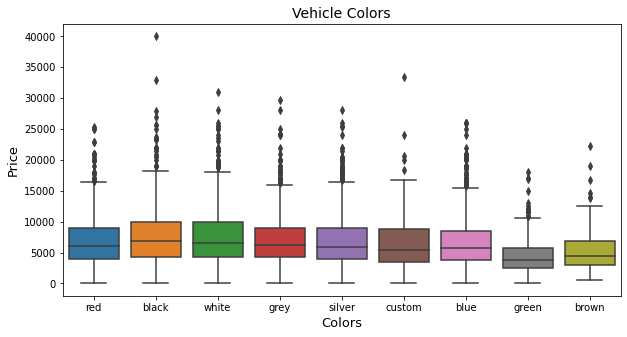

In [15]:
sedan_cars_only = filtered_df.query('paint_color != "yellow" & paint_color != "purple" & paint_color != "orange" & type == "sedan"')


plt.figure(figsize=(10, 5))
sns.scatterplot(data=sedan_cars_only, x='vehicle_age', y='price')
plt.title('Vehicle Age / Price', size=14)
plt.xlabel('Age', size=13)
plt.ylabel('Price', size=13);

plt.figure(figsize=(10, 5))
sns.scatterplot(data=sedan_cars_only, x='odometer', y='price')
plt.title('Odometer Mileage / Price', size=14)
plt.xlabel('Mileage', size=13)
plt.ylabel('Price', size=13);

plt.figure(figsize=(10, 5))
sns.scatterplot(data=sedan_cars_only, x='condition', y='price')
plt.title('Condition / Price', size=14)
plt.xlabel('Condition', size=13)
plt.ylabel('Price', size=13);

plt.figure(figsize=(10, 5))
sns.boxplot(data=sedan_cars_only, x='paint_color', y='price')
plt.title('Vehicle Colors', size=14)
plt.xlabel('Colors', size=13)
plt.ylabel('Price', size=13);

The results for Sedans show a linear decrease in price as more miles accumulate on the odometer, as well as a linear decrease in age. However, compared to SUVs, the prices are much lower overall. With the condition of the vehicles there are again significantly less vehicles with a condtion of 'Like New'. With vehicle colors, all colors are about at the same price, but black and white are slightly higher priced.

Overall, vehicle age and mileage carries a clear linear decrease in price the higher for each. For both cars types they have the same average of listings for each condtion of the vehicles, although Sedans are typically lower priced. Vehicle colors plays little effect on Sedan price compared to SUVs, which can vary m

## Overall conclusion

Vehicle age generally influences the price of a vehicle in the ads with a linear slope downward as the age of the vehicle goes up. It can start for newest cars anywhere in the price spectrum, but as it gets older all ads for that car type tend to smaller and cheaper. However, there are exceptions for this rule: Vehicles such as those under "Other", "Convertibles", and "Coupe" may have a wide range as the vehicle gets older that doesn't follow any trend, and prices may continue to vary up and down regardless of it's age.

The vehicle's odometer has a much more consistent affect on it's price, having a constant downtrend with all vehicles, including those that didn't follow a trend with age.

The condition of the vehicle follows an expected trend that there are almost no condition 5 cars, "New", as it would unreasonable for a buyer to immediately resell a brand new vehicle. For condition 2 and 3 vehicles, "Good" and "Excellent" respectively, tend to have a bulk of the listings in the lower half of the price range of 15k and under. Those in condition 4, "Like New", tend to have a slightly higher price range per vehicle, but still find an unusual amount still resting in the lower price range.

Transmission type tends to follow the general rule that automatics are priced higher, then manuals, then 'other'. However, in the case of SUV's manual is priced just a bit higher, and some cars like 'Vans' and 'Pickups' have an unusually higher price for transmissions in the 'other' category, with the other transmission types falling behind.

For colors, Sedans, Mini-Vans, Vans, Hatchbacks, Wagons, and 'Other' vehicle types tend to be priced the same across the board regardless of color choice, although some with noticable but mostly insignificant price differences. For SUV's, Orange is unusually a more highly priced version and Yellow having a much wider range of prices than other colors. Yellow's range may hint that the body or tint of yellow may vary noticably depending on the vehicle, explaining the bigger range. With Convertibles, Black, Custom colors, Orange, and Yellow are priced quite higher on average than other colors. Coupe style vehicles are different than the other vehicles in that there is a much larger range of prices for each color, and with Yellow being alarmingly more highly priced. Offroad vehicles in general are more highly priced than the others, with all color prices showing as much. However, there is also more of a wider range of prices per color. Pickups and Trucks also follow the trend of a much wider range of prices with colors.

Overall, a vehicle's age, odometer, and condition have expected results in it's pricing. Some vehicles are priced more in general comparatively but all tend to follow the same trend. In the case of transmission, an automatic vehicle is the better priced transmission but may vary for a few vehicle categories. Colors are much more random across prices but the majority tend to be priced similarly. There are some noticible differences with some colors with specific vehicle types being much more higher priced, although there seems to be little evidence to suggest why this may be the case.